In [1]:
!pip install torch
!pip install torchvision


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import argparse
import os
import numpy as np
import math
import sys
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as T
from torchvision.utils import save_image
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torch.nn as nn


c:\Users\mzhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
image_size = 64
batch_size = 64
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

trainloader = datasets.ImageFolder(
    "cartoon/train", 
    transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

trainloader = DataLoader(trainloader, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [4]:
classes = ('donald', 'mickey', 'minion', 'olaf', 'pooh', 'pumba')

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

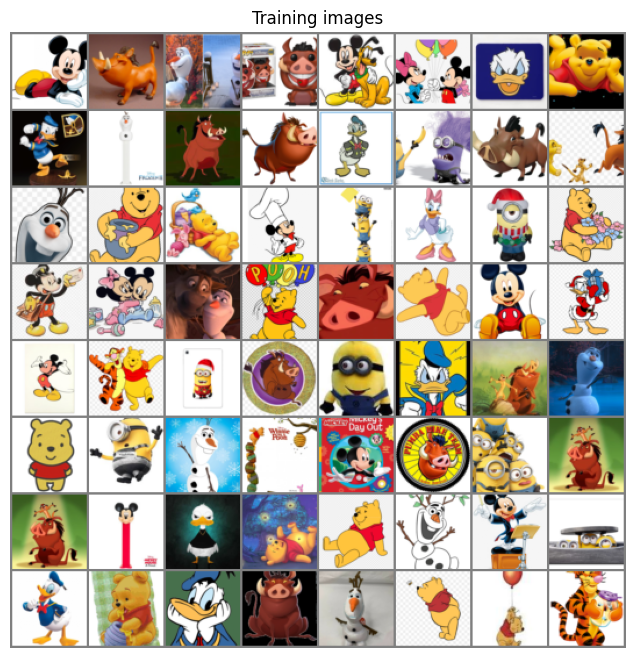

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img,title):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images),"Training images")

In [7]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([64, 3, 64, 64])
torch.Size([64])


In [ ]:
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3,4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(4* 16 * 16, 6)
        ) 
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [9]:
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1024, out_features=6, bias=True)
  )
)


In [11]:
running_loss = 0

for i in range(20):
    if i > 0:
        print("Epoch {} - Training loss: {}".format(i, running_loss/len(trainloader)))

    running_loss = 0
    try:
        for images, labels in trainloader:
            try:
                optimizer.zero_grad()
                output = model(images)
                loss = criterion(output, labels)
                loss.backward()
                optimizer.step()  
                running_loss += loss.item()
            except OSError as e:
                continue
    except OSError as e:
        continue
            
print("Epoch {} - Training loss: {}".format(20, running_loss/len(trainloader)))
    

Epoch 1 - Training loss: 0.0
Epoch 2 - Training loss: 0.06475953784372125
Epoch 3 - Training loss: 0.015944218263030052
Epoch 4 - Training loss: 0.013317186651485307
Epoch 5 - Training loss: 0.21043799365205423
Epoch 6 - Training loss: 0.0673105823142188
Epoch 7 - Training loss: 0.224028712803764
Epoch 8 - Training loss: 0.08858567316617284
Epoch 9 - Training loss: 0.1487115350152765
Epoch 10 - Training loss: 0.19898016697594098
Epoch 11 - Training loss: 0.09260035492479801
Epoch 12 - Training loss: 0.13158161978104285
Epoch 13 - Training loss: 0.060365110103573115
Epoch 14 - Training loss: 0.05398145963304809
Epoch 15 - Training loss: 0.00832706703139203
Epoch 16 - Training loss: 0.09632219932973385
Epoch 17 - Training loss: 0.07803660870662757
Epoch 18 - Training loss: 0.061017410696617196
Epoch 19 - Training loss: 0.05300457432999143
Epoch 20 - Training loss: 0.028586894273757935


In [12]:
dataroot='cartoon/test/'
testloader = datasets.ImageFolder(dataroot, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

testloader = DataLoader(testloader, batch_size, shuffle=True, num_workers=3, pin_memory=True)

In [13]:
correct_count, all_count = 0, 0
for images, labels in testloader:
    for i in range(len(labels)):
        with torch.no_grad():  
            output = model(images)
        ps = torch.exp(output)
        probab = list(ps.cpu()[i])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 433

Model Accuracy = 0.8729792147806005


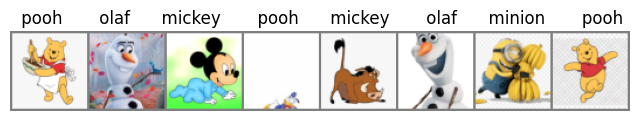

In [14]:
_, predicted = torch.max(output, 1)

imshow(torchvision.utils.make_grid(images[:8]).cpu().clone(), '      '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

In [15]:
model_path = "nn.pth"
torch.save(model.state_dict(), model_path)

In [16]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1024, out_features=6, bias=True)
  )
)

In [17]:
from PIL import Image

image_path = "cartoon/test/donald/5a8952c988ca495507d0a89aa379638b.jpg"
image = Image.open(image_path)
transform = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
input_image = transform(image).unsqueeze(0)

with torch.no_grad():
    output = model(input_image)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
predicted_class = torch.argmax(probabilities).item()

print(probabilities)
print(f"Predicted Class: {predicted_class}")

tensor([9.9994e-01, 3.3408e-06, 9.3017e-09, 7.5454e-14, 2.7657e-05, 2.7449e-05])
Predicted Class: 0
